In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [6]:
def plot_sample(x,y,index):
  plt.figure(figsize=(14,2))
  plt.imshow(x[index])
  plt.xlabel(y[index])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


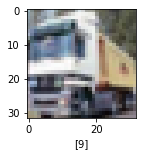

In [7]:
plot_sample(x_train,y_train,1)

In [8]:
x_train=x_train/255
x_test=x_test/255

In [9]:
cnn=models.Sequential([
                       #feature extraction
                       layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),
                       layers.MaxPool2D((2,2)),
                      
                       layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),
                       layers.MaxPool2D((2,2)),

                       #classification
                       layers.Flatten(),
                       layers.Dense(64,activation='relu'),
                       layers.Dense(10,activation='softmax')
                       

])

In [10]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
cnn.fit(x_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 64s 40ms/step - loss: 1.5037 - accuracy: 0.4589
Epoch 2/20
1563/1563 [==============================] - 54s 35ms/step - loss: 1.1770 - accuracy: 0.5872
Epoch 3/20
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0510 - accuracy: 0.6334
Epoch 4/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9764 - accuracy: 0.6607
Epoch 5/20
1563/1563 [==============================] - 52s 34ms/step - loss: 0.9127 - accuracy: 0.6813
Epoch 6/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8721 - accuracy: 0.6975
Epoch 7/20
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8302 - accuracy: 0.7116
Epoch 8/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7937 - accuracy: 0.7233
Epoch 9/20
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7595 - accuracy: 0.7355
Epoch 10/20
1563/1563 [==============================] - 54s 34m

In [12]:
y_pred=cnn.predict(x_test)

In [13]:
y_classes=[np.argmax(element) for element in y_pred]
print('Classification report: \n',classification_report(y_test,y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.64      0.79      0.71      1000
           1       0.85      0.77      0.81      1000
           2       0.63      0.53      0.57      1000
           3       0.50      0.47      0.48      1000
           4       0.65      0.63      0.64      1000
           5       0.59      0.62      0.61      1000
           6       0.71      0.78      0.75      1000
           7       0.75      0.73      0.74      1000
           8       0.79      0.78      0.78      1000
           9       0.75      0.77      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

